# Analyse einer PV-Anlage

Dieses Notebook analysiert die Produktions- und Verbrauchsdaten einer Photovoltaik-Anlage. Es werden folgende Aspekte untersucht:

- Tägliche Energieproduktion und Verbrauch
- Durchschnittlicher Tagesverlauf
- Analyse der Eigenversorgung und Energiebilanz

## Daten importieren und vorbereiten

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

### Daten einlesen
Wir lesen die Daten aus drei CSV-Dateien (A.csv, B.csv, C.csv) und führen sie zusammen.

In [10]:
# Daten einlesen
df_a = pd.read_csv('data/A.csv', parse_dates=['Timestamp'])
df_b = pd.read_csv('data/B.csv', parse_dates=['Timestamp'])
df_c = pd.read_csv('data/C.csv', parse_dates=['Timestamp'])

# Daten zusammenführen
dfs = [df_a, df_b, df_c]
df = pd.concat(dfs, axis=0)
df = df.sort_values('Timestamp').reset_index(drop=True)

# Zeige die ersten Zeilen des zusammengeführten Datensatzes
df.head()

,Timestamp,Generation_kW,Grid_Feed-In_kW,Grid_Supply_kW,Overall_Consumption_Calc_kW
0,2019-01-01 00:00:00,0.0,0.0,4.212,4.212
1,2019-01-01 00:00:00,NaN,0.0,2.800,NaN
2,2019-01-01 00:00:00,0.0,0.0,5.400,5.400
3,2019-01-01 00:15:00,0.0,0.0,4.212,4.212
4,2019-01-01 00:15:00,NaN,0.0,2.800,NaN


### Tägliche Summen berechnen
Wir aggregieren die Daten auf Tagesebene, um die täglichen Summen für Produktion und Verbrauch zu analysieren.

In [3]:
# Tägliche Summen berechnen
df['Date'] = df['Timestamp'].dt.date
daily_sums = df.groupby('Date').agg({
    'Generation_kW': 'sum',
    'Grid_Supply_kW': 'sum',
    'Grid_Feed-In_kW': 'sum',
    'Overall_Consumption_Calc_kW': 'sum'
}).reset_index()

daily_sums.head()

,Date,Generation_kW,Grid_Supply_kW,Grid_Feed-In_kW,Overall_Consumption_Calc_kW
0,2019-01-01,368.560,1278.776,155.312,1088.024
1,2019-01-02,886.412,1059.700,534.504,1109.208
2,2019-01-03,931.004,1502.120,345.040,1804.284
3,2019-01-04,1007.944,1609.452,319.040,1947.356
4,2019-01-05,9.048,1231.536,0.000,1016.184


## Visualisierungen

### 1. Tägliche Energieproduktion vs. Verbrauch

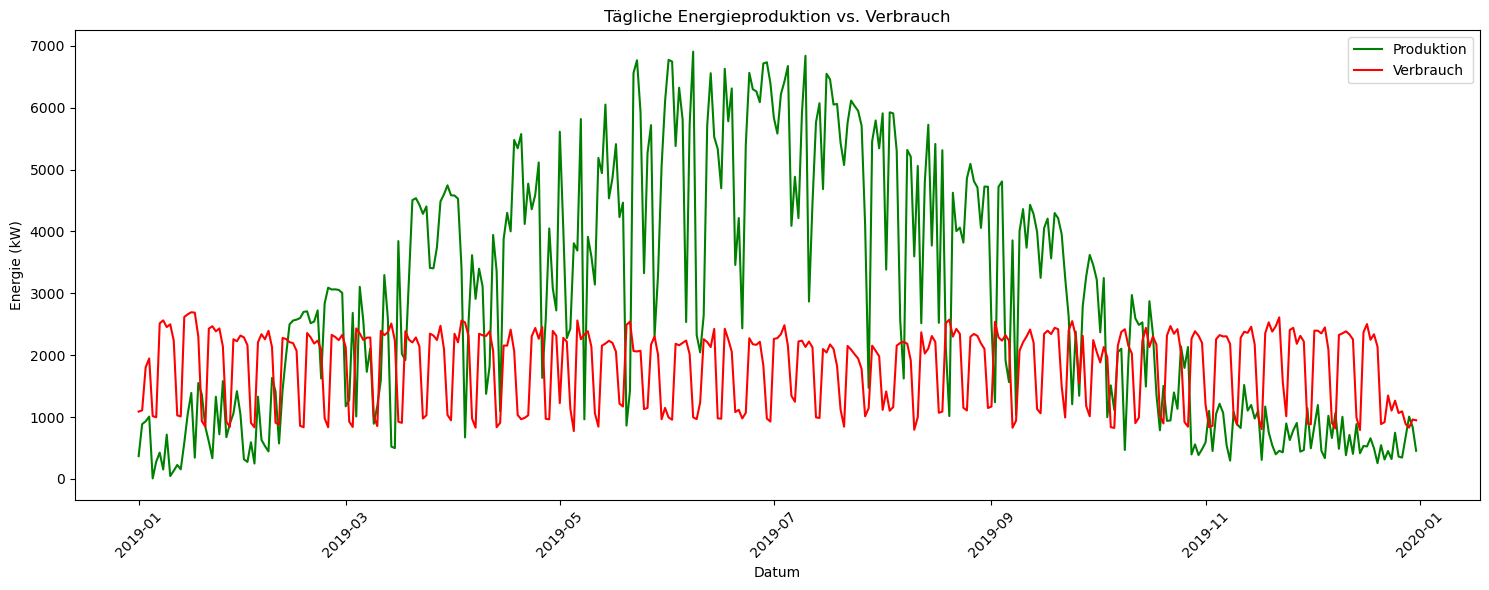

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(daily_sums['Date'], daily_sums['Generation_kW'], label='Produktion', color='green')
plt.plot(daily_sums['Date'], daily_sums['Overall_Consumption_Calc_kW'], label='Verbrauch', color='red')
plt.title('Tägliche Energieproduktion vs. Verbrauch')
plt.xlabel('Datum')
plt.ylabel('Energie (kW)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

### 2. Durchschnittlicher Tagesverlauf
Dieser Plot zeigt den durchschnittlichen Verlauf von Produktion und Verbrauch über einen Tag.

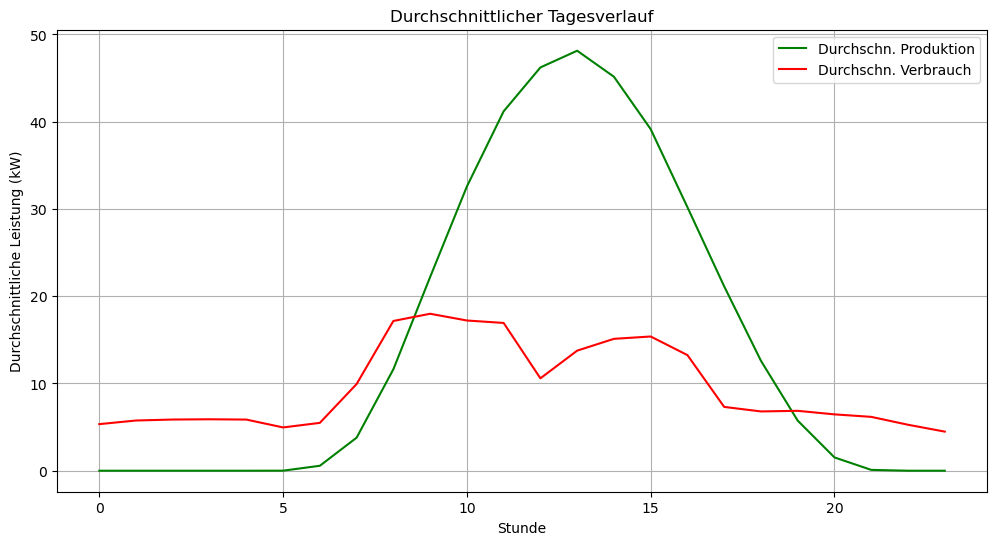

In [5]:
# Durchschnittlichen Tagesverlauf berechnen
df['Hour'] = df['Timestamp'].dt.hour
hourly_avg = df.groupby('Hour').agg({
    'Generation_kW': 'mean',
    'Overall_Consumption_Calc_kW': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg['Hour'], hourly_avg['Generation_kW'], label='Durchschn. Produktion', color='green')
plt.plot(hourly_avg['Hour'], hourly_avg['Overall_Consumption_Calc_kW'], label='Durchschn. Verbrauch', color='red')
plt.title('Durchschnittlicher Tagesverlauf')
plt.xlabel('Stunde')
plt.ylabel('Durchschnittliche Leistung (kW)')
plt.legend()
plt.grid(True)

## Analyse der Eigenversorgung
Wir untersuchen, an wie vielen Tagen die Eigenproduktion den Verbrauch decken konnte und berechnen die Gesamtenergiebilanz.

In [6]:
# Analyse der Eigenversorgung
daily_sums['self_sufficient'] = daily_sums['Generation_kW'] >= daily_sums['Overall_Consumption_Calc_kW']
self_sufficient_days = daily_sums['self_sufficient'].sum()
total_days = len(daily_sums)

print(f"Analyseergebnisse:")
print(f"Gesamtzahl der Tage: {total_days}")
print(f"Tage mit ausreichender Eigenproduktion: {self_sufficient_days}")
print(f"Prozentsatz der Tage mit Eigenversorgung: {(self_sufficient_days/total_days)*100:.2f}%")

# Energiebilanz
total_production = daily_sums['Generation_kW'].sum()
total_consumption = daily_sums['Overall_Consumption_Calc_kW'].sum()
print(f"\nGesamtproduktion: {total_production:.2f} kW")
print(f"Gesamtverbrauch: {total_consumption:.2f} kW")
print(f"Energiebilanz: {((total_production/total_consumption)*100):.2f}% des Verbrauchs wird durch Eigenproduktion gedeckt")

Analyseergebnisse:
Gesamtzahl der Tage: 365
Tage mit ausreichender Eigenproduktion: 229
Prozentsatz der Tage mit Eigenversorgung: 62.74%

Gesamtproduktion: 1056566.47 kW
Gesamtverbrauch: 671094.26 kW
Energiebilanz: 157.44% des Verbrauchs wird durch Eigenproduktion gedeckt


# TSM Plot (Sandra)

# Verlustleistung messen (Abi)

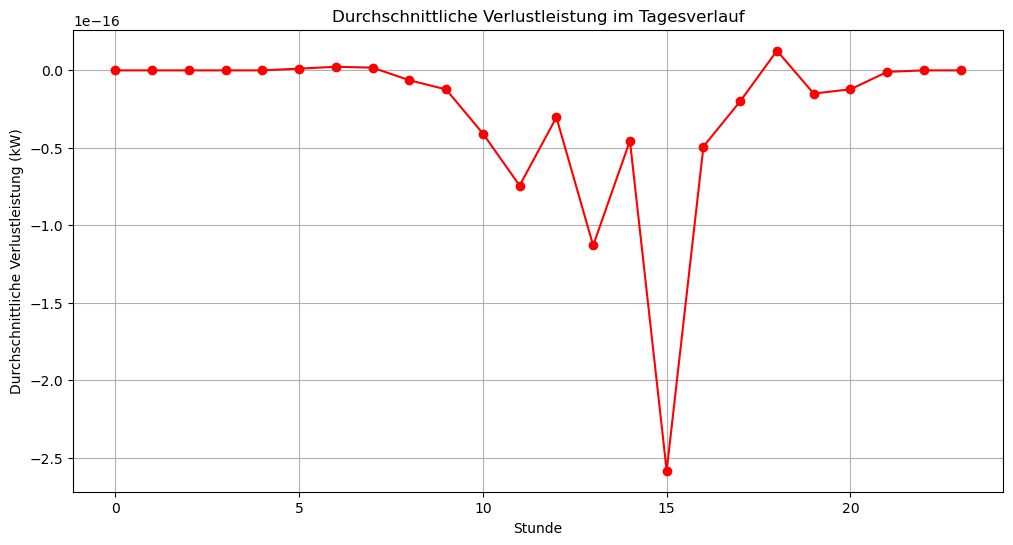


Statistik der Verlustleistung:
Durchschnittliche Verlustleistung: -0.00 kW
Maximale Verlustleistung: 0.00 kW
Gesamtverlust: -0.00 kW


In [7]:
# Berechnung der Verlustleistung
df['Local_Consumption_kW'] = df['Overall_Consumption_Calc_kW'] - df['Grid_Supply_kW']
df['Power_Loss_kW'] = df['Generation_kW'] - df['Grid_Feed-In_kW'] - df['Local_Consumption_kW']

# Durchschnittliche Verluste pro Stunde
hourly_losses = df.groupby(df['Timestamp'].dt.hour)['Power_Loss_kW'].mean()

# Visualisierung der durchschnittlichen Verluste im Tagesverlauf
plt.figure(figsize=(12, 6))
plt.plot(hourly_losses.index, hourly_losses.values, color='red', marker='o')
plt.title('Durchschnittliche Verlustleistung im Tagesverlauf')
plt.xlabel('Stunde')
plt.ylabel('Durchschnittliche Verlustleistung (kW)')
plt.grid(True)
plt.show()

# Gesamtstatistik der Verluste
total_loss = df['Power_Loss_kW'].sum()
avg_loss = df['Power_Loss_kW'].mean()
max_loss = df['Power_Loss_kW'].max()

print(f'\nStatistik der Verlustleistung:')
print(f'Durchschnittliche Verlustleistung: {avg_loss:.2f} kW')
print(f'Maximale Verlustleistung: {max_loss:.2f} kW')
print(f'Gesamtverlust: {total_loss:.2f} kW')

### Analyse der Verlustleistung in Abhängigkeit von Produktion und Temperatur
Nachfolgend analysieren wir:
1. Den Zusammenhang zwischen Produktionsleistung und Verlustleistung (Wechselrichtereffizienz)
2. Den Einfluss der Außentemperatur auf die Verlustleistung

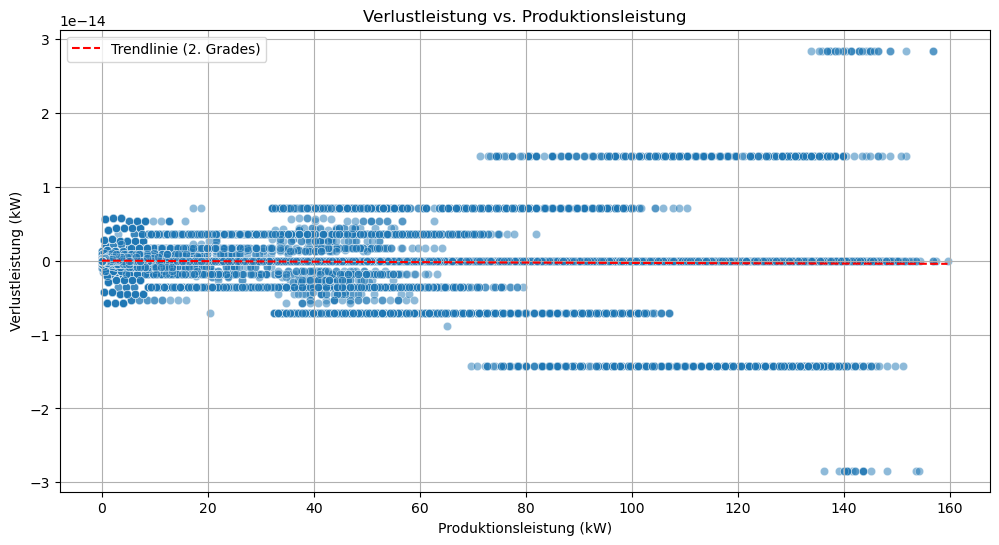


Effizienzanalyse nach Leistungsbereich:
             Loss_Ratio_Mean  Generation_kW_Mean  Count
Power_Range                                            
0-20%                   -0.0               4.350  58756
20-40%                  -0.0              42.733   5901
40-60%                  -0.0              79.490   2400
60-80%                  -0.0             111.684   2194
80-100%                 -0.0             136.335    829


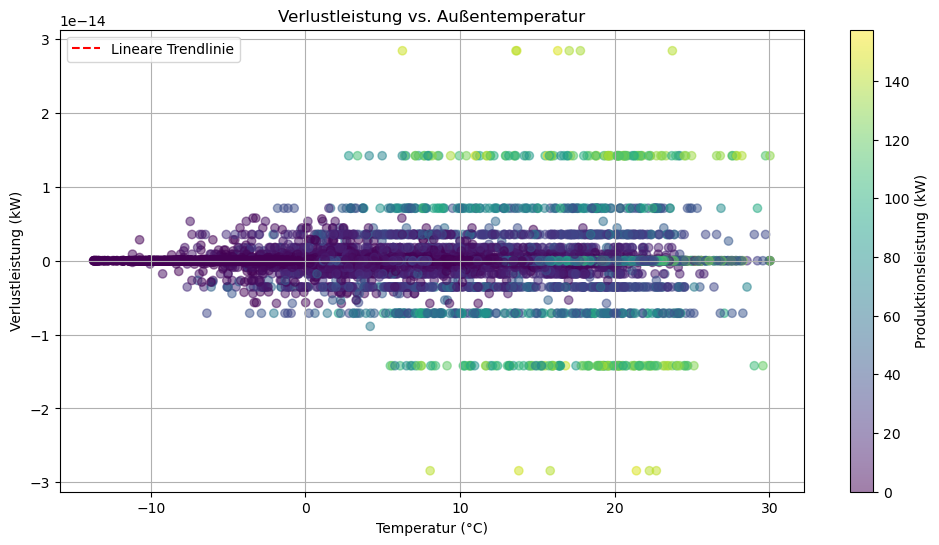


Verlustanalyse nach Temperaturbereich:
            Power_Loss_kW_Mean  Power_Loss_kW_Max  Count  Loss_Ratio_Mean
Temp_Range                                                               
< 0°C                     -0.0                0.0   4208             -0.0
0-10°C                    -0.0                0.0   7080             -0.0
10-20°C                   -0.0                0.0   5174             -0.0
20-30°C                   -0.0                0.0   1054             -0.0
> 30°C                     0.0                0.0      4              0.0


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Daten einlesen und zusammenführen -----------------------------------
df_a = pd.read_csv('data/A.csv', parse_dates=['Timestamp'])
df_b = pd.read_csv('data/B.csv', parse_dates=['Timestamp'])
df_c = pd.read_csv('data/C.csv', parse_dates=['Timestamp'])

df = pd.concat([df_a, df_b, df_c], ignore_index=True)
df = df.sort_values('Timestamp').reset_index(drop=True)

# --- 2. Power_Loss_kW berechnen ---------------------------------------------
# Power_Loss = Generation - (PV-Selbstverbrauch) - Einspeisung
# PV-Selbstverbrauch = Generation - Grid_Feed-In
# Alternativ über Overall_Consumption_Calc / Grid_Supply:
df['Power_Loss_kW'] = (
      df['Generation_kW']
    - (df['Overall_Consumption_Calc_kW'] - df['Grid_Supply_kW'])
    - df['Grid_Feed-In_kW']
)

# Optional: sehr kleine Werte auf 0 setzen (rundungsbedingt)
# df.loc[df['Power_Loss_kW'].abs() < 1e-6, 'Power_Loss_kW'] = 0

# --- 3. Analyse: Verlustleistung vs. Produktionsleistung --------------------
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Generation_kW', y='Power_Loss_kW', alpha=0.5)

# NaNs rausfiltern
mask = df['Generation_kW'].notna() & df['Power_Loss_kW'].notna()
x = df.loc[mask, 'Generation_kW']
y = df.loc[mask, 'Power_Loss_kW']

# Zentrieren und Skalieren
x_mean, x_std = x.mean(), x.std()
x_scaled = (x - x_mean) / x_std

# Quadratische Trendlinie
coeffs_quad = np.polyfit(x_scaled, y, 2)
poly_quad   = np.poly1d(coeffs_quad)

# Glatte Linie im Originalbereich
x_plot = np.linspace(x.min(), x.max(), 200)
x_plot_scaled = (x_plot - x_mean) / x_std
y_plot = poly_quad(x_plot_scaled)

plt.plot(x_plot, y_plot, 'r--', label='Trendlinie (2. Grades)')
plt.title('Verlustleistung vs. Produktionsleistung')
plt.xlabel('Produktionsleistung (kW)')
plt.ylabel('Verlustleistung (kW)')
plt.legend()
plt.grid(True)
plt.show()

# --- 4. Effizienzquote und Leistungsbereiche -------------------------------
df['Loss_Ratio'] = df['Power_Loss_kW'] / df['Generation_kW']

labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
try:
    df['Power_Range'] = pd.qcut(
        df['Generation_kW'],
        q=5,
        labels=labels,
        duplicates='drop'
    )
except ValueError:
    df['Power_Range'] = pd.cut(
        df['Generation_kW'],
        bins=5,
        labels=labels,
        include_lowest=True
    )

efficiency_analysis = df.groupby('Power_Range', observed=False).agg(
    Loss_Ratio_Mean     = ('Loss_Ratio', 'mean'),
    Generation_kW_Mean  = ('Generation_kW', 'mean'),
    Count               = ('Generation_kW', 'count')
).round(3)

print('\nEffizienzanalyse nach Leistungsbereich:')
print(efficiency_analysis)

# --- 5. Analyse: Verlustleistung vs. Temperatur -----------------------------
try:
    # Korrektes Einlesen der Wetterdaten: Spalte heißt 'time'
    weather_df = pd.read_csv(
        'data/weather_aargau_2019.csv',
        parse_dates=['time']
    )
    weather_df.rename(columns={'time': 'Timestamp'}, inplace=True)

    # Zusammenführen auf Timestamp
    df_merged = pd.merge(df, weather_df, on='Timestamp', how='inner')

    plt.figure(figsize=(12, 6))
    sc = plt.scatter(
        df_merged['temperature'],
        df_merged['Power_Loss_kW'],
        c=df_merged['Generation_kW'],
        cmap='viridis',
        alpha=0.5
    )
    plt.colorbar(sc, label='Produktionsleistung (kW)')

    # Lineare Trendlinie
    coeffs_lin = np.polyfit(df_merged['temperature'], df_merged['Power_Loss_kW'], 1)
    poly_lin   = np.poly1d(coeffs_lin)
    x_temp = np.sort(df_merged['temperature'])
    plt.plot(x_temp, poly_lin(x_temp), 'r--', label='Lineare Trendlinie')

    plt.title('Verlustleistung vs. Außentemperatur')
    plt.xlabel('Temperatur (°C)')
    plt.ylabel('Verlustleistung (kW)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Temperaturbereich-Analyse
    temp_bins   = [-np.inf, 0, 10, 20, 30, np.inf]
    temp_labels = ['< 0°C', '0-10°C', '10-20°C', '20-30°C', '> 30°C']
    df_merged['Temp_Range'] = pd.cut(
        df_merged['temperature'],
        bins=temp_bins,
        labels=temp_labels,
        include_lowest=True
    )

    temp_analysis = df_merged.groupby('Temp_Range', observed=False).agg(
        Power_Loss_kW_Mean = ('Power_Loss_kW', 'mean'),
        Power_Loss_kW_Max  = ('Power_Loss_kW', 'max'),
        Count              = ('Power_Loss_kW', 'count'),
        Loss_Ratio_Mean    = ('Loss_Ratio', 'mean')
    ).round(3)

    print('\nVerlustanalyse nach Temperaturbereich:')
    print(temp_analysis)

except Exception as e:
    print(f'Fehler beim Laden/Verarbeiten der Wetterdaten: {e}')



# Verbrauch auf Tag (Sheena) mit Wetter Daten